In [2]:
import pandas as pd
import numpy as np

from glob import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('ggplot')

In [3]:
annot = pd.read_parquet('textOCR/annot.parquet')
imgs = pd.read_parquet('textOCR/img.parquet')
img_fns = glob('textOCR/train_val_images/train_images/*')

In [4]:
len(img_fns)

2705

In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

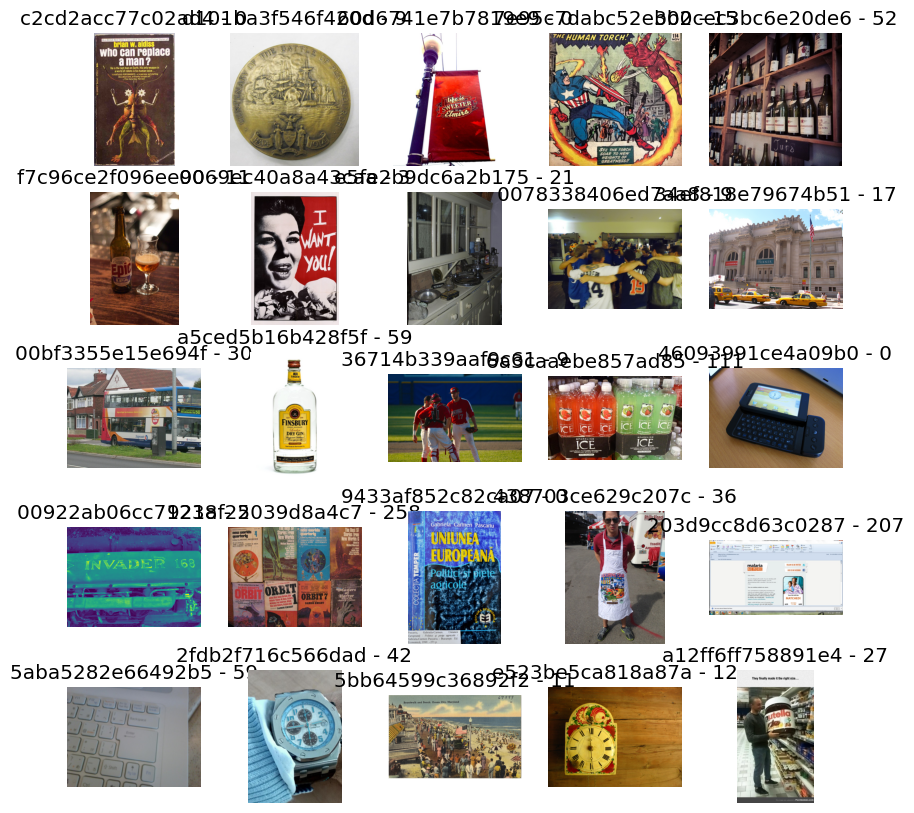

In [8]:
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
axs = axs.flatten()
for i in range(25):
    axs[i].imshow(plt.imread(img_fns[i]))
    axs[i].axis('off')
    image_id = img_fns[i].split('/')[-1].rstrip('.jpg')
    n_annot = len(annot.query('image_id == @image_id'))
    axs[i].set_title(f'{image_id} - {n_annot}')
plt.show()

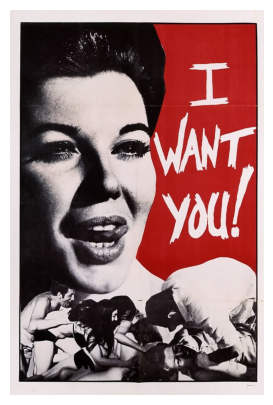

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(plt.imread(img_fns[6]))
ax.axis('off')
plt.show()

In [19]:
image_id = img_fns[5].split('/')[-1].split('.')[0]
annot.query('image_id == @image_id')

,id,image_id,bbox,utf8_string,points,area
136065,f7c96ce2f096ee90_1,f7c96ce2f096ee90,"[157.72, 533.95, 161.05, 131.67]",Epic,"[158.77, 538.14, 318.77, 533.95, 318.77, 665.6...",21205.45
136066,f7c96ce2f096ee90_2,f7c96ce2f096ee90,"[172.24, 524.82, 19.21, 24.23]",THE,"[172.24, 542.47, 183.67, 524.82, 191.45, 532.9...",465.46
136067,f7c96ce2f096ee90_3,f7c96ce2f096ee90,"[230.39, 512.88, 17.82, 9.86]",TO,"[230.39, 513.22, 247.87, 512.88, 248.21, 522.7...",175.71
136068,f7c96ce2f096ee90_4,f7c96ce2f096ee90,"[248.56, 512.36, 56.93, 29.94]",EVERYTHING,"[249.42, 512.36, 270.19, 512.88, 283.69, 515.1...",1704.48
136069,f7c96ce2f096ee90_5,f7c96ce2f096ee90,"[232.26, 536.79, 15.67, 11.9]",42,"[232.41, 537.54, 247.17, 536.79, 247.93, 548.5...",186.47
136070,f7c96ce2f096ee90_6,f7c96ce2f096ee90,"[196.75, 653.01, 91.44, 22.26]",ARMAGEDDON,"[196.75, 657.78, 287.2, 653.01, 288.19, 671.89...",2035.45
136071,f7c96ce2f096ee90_7,f7c96ce2f096ee90,"[195.36, 662.75, 109.53, 38.36]",I.P.A.,"[195.36, 666.72, 304.1, 662.75, 304.89, 693.36...",4201.57
136072,f7c96ce2f096ee90_8,f7c96ce2f096ee90,"[218.5, 701.1, 23.05, 10.09]",.,"[218.5, 701.4, 241.55, 701.1, 241.4, 711.19, 2...",232.57
136073,f7c96ce2f096ee90_9,f7c96ce2f096ee90,"[241.4, 701.85, 19.88, 9.34]",.,"[241.55, 703.21, 260.53, 701.85, 261.28, 709.9...",185.68
136074,f7c96ce2f096ee90_10,f7c96ce2f096ee90,"[259.63, 696.73, 17.02, 12.66]",.,"[259.63, 703.06, 274.24, 696.73, 276.65, 703.6...",215.47


In [10]:
!pip install keras-ocr -q


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [11]:
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

2023-05-23 02:10:08.979133: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the SageMaker Profiler.
2023-05-23 02:10:08.979256: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:105] SageMaker Profiler is not enabled. The timeline writer thread will not be started, future recorded events will be dropped.
2023-05-23 02:10:09.026389: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the SageMaker Profiler.


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [20]:
results = pipeline.recognize([img_fns[6]])

1/1 [==============================] - 1s 585ms/step


In [21]:
pd.DataFrame(results[0], columns=['text', 'bbox'])

,text,bbox
0,t,"[[474.0, 140.0], [582.0, 140.0], [582.0, 256.0..."
1,want,"[[377.24982, 316.42517], [634.6711, 288.5515],..."
2,yout,"[[409.8196, 483.6189], [620.43396, 479.5686], ..."


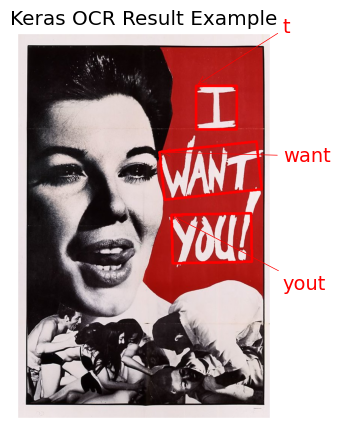

In [22]:
fig, ax = plt.subplots(figsize=(5, 5))
keras_ocr.tools.drawAnnotations(plt.imread(img_fns[6]), results[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.show()